# SFT Model Evaluation Visualization

This notebook visualizes the evaluation results comparing the base model vs SFT model.

In [1]:
import json
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

# Load evaluation results from the same directory as this notebook
notebook_dir = Path().resolve()
results_path = notebook_dir / "eval_results.json"

with open(results_path, 'r', encoding='utf-8') as f:
    results = json.load(f)

# Extract average metrics
base_metrics = results['base_model']['avg_metrics']
sft_metrics = results['sft_model']['avg_metrics']

print("Evaluation Results Loaded Successfully!")
print(f"Number of samples evaluated: {results['num_samples_evaluated']}")
print(f"Random seed used: {results['random_seed']}")

Evaluation Results Loaded Successfully!
Number of samples evaluated: 50
Random seed used: 42


## All Metrics Comparison

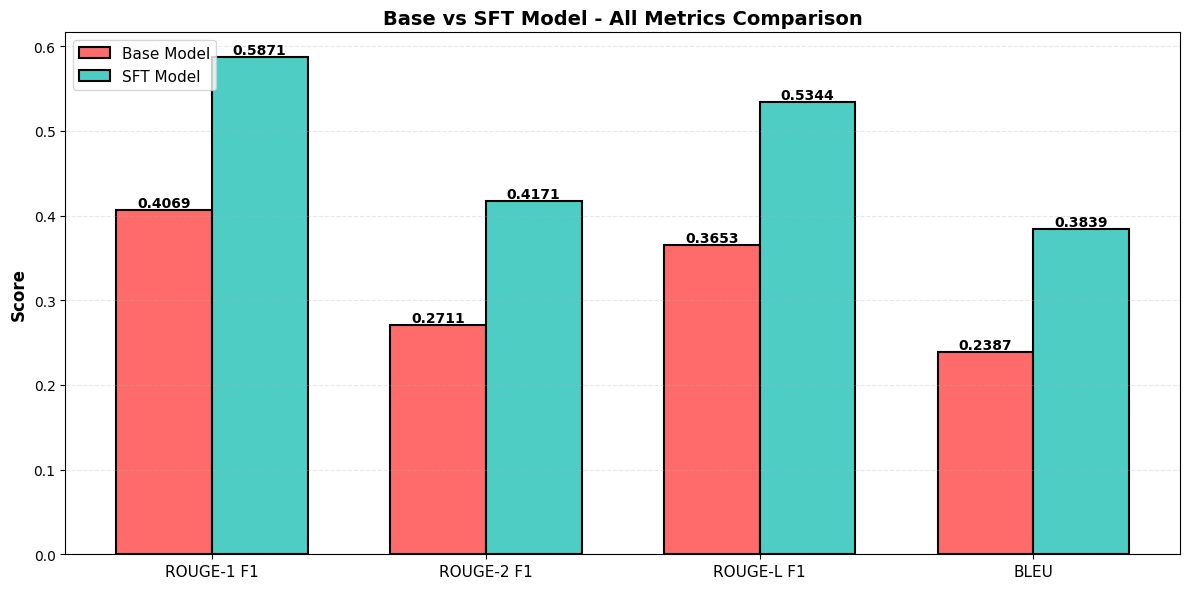


Improvement Percentages:
----------------------------------------
ROUGE-1 F1      +44.30%
ROUGE-2 F1      +53.88%
ROUGE-L F1      +46.28%
BLEU            +60.84%


In [3]:
# Prepare data for all metrics
metrics = ['ROUGE-1 F1', 'ROUGE-2 F1', 'ROUGE-L F1', 'BLEU']
base_scores = [
    base_metrics['rouge1_f1'],
    base_metrics['rouge2_f1'],
    base_metrics['rougeL_f1'],
    base_metrics['bleu']
]
sft_scores = [
    sft_metrics['rouge1_f1'],
    sft_metrics['rouge2_f1'],
    sft_metrics['rougeL_f1'],
    sft_metrics['bleu']
]

# Set up bar positions
x = np.arange(len(metrics))
width = 0.35

# Create bar graph
fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, base_scores, width, label='Base Model', color='#FF6B6B', edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x + width/2, sft_scores, width, label='SFT Model', color='#4ECDC4', edgecolor='black', linewidth=1.5)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customize plot
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Base vs SFT Model - All Metrics Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=11)
ax.legend(loc='upper left', fontsize=11)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Print improvement percentages
print("\nImprovement Percentages:")
print("-" * 40)
metric_keys = ['rouge1_f1', 'rouge2_f1', 'rougeL_f1', 'bleu']
for i, metric in enumerate(metrics):
    base = base_scores[i]
    sft = sft_scores[i]
    improvement = ((sft - base) / base) * 100 if base > 0 else 0
    print(f"{metric:<15} {improvement:+.2f}%")

## SFT Improvement Percentage

C:\Users\jaymi\AppData\Local\Temp\ipykernel_13320\2368584656.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(metrics, fontsize=11)


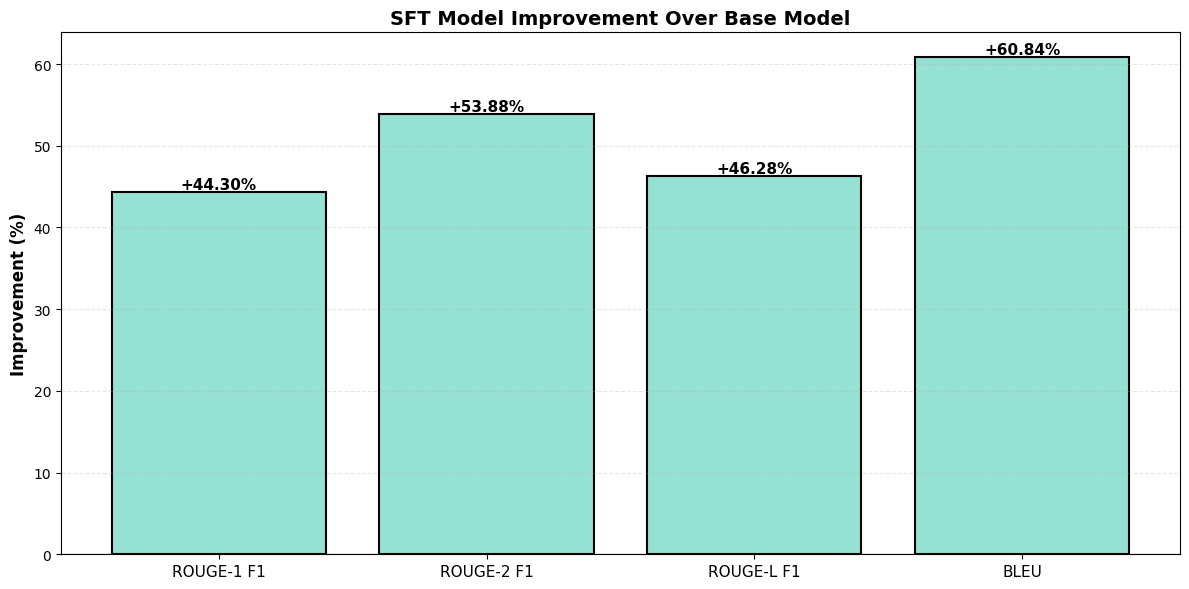


Improvement Summary:
----------------------------------------
ROUGE-1 F1      +44.30%
ROUGE-2 F1      +53.88%
ROUGE-L F1      +46.28%
BLEU            +60.84%


In [4]:
# Calculate improvement percentages
metrics = ['ROUGE-1 F1', 'ROUGE-2 F1', 'ROUGE-L F1', 'BLEU']
improvements = []

for i, metric in enumerate(metrics):
    base = base_scores[i]
    sft = sft_scores[i]
    improvement = ((sft - base) / base) * 100 if base > 0 else 0
    improvements.append(improvement)

# Create improvement bar graph
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(metrics, improvements, color='#95E1D3', edgecolor='black', linewidth=1.5)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:+.2f}%',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Customize plot
ax.set_ylabel('Improvement (%)', fontsize=12, fontweight='bold')
ax.set_title('SFT Model Improvement Over Base Model', fontsize=14, fontweight='bold')
ax.set_xticklabels(metrics, fontsize=11)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)

plt.tight_layout()
plt.show()

# Print summary
print("\nImprovement Summary:")
print("-" * 40)
for i, metric in enumerate(metrics):
    print(f"{metric:<15} {improvements[i]:+.2f}%")